In [3]:
#in this code,only those features are dropped according to reseaarch paper paragrph,null columns and constant value features and only string columns which contained 7 columns


import pandas as pd
import numpy
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
features = ['frame.interface_id',
 'frame.dlt',
 'frame.offset_shift',
 'frame.time_epoch',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_relative',
 'frame.len',
 'frame.cap_len',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.length',
 'radiotap.present.tsft',
 'radiotap.present.flags',
 'radiotap.present.rate',
 'radiotap.present.channel',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antsignal',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.antenna',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.rxflags',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'radiotap.mactime',
 'radiotap.flags.cfp',
 'radiotap.flags.preamble',
 'radiotap.flags.wep',
 'radiotap.flags.frag',
 'radiotap.flags.fcs',
 'radiotap.flags.datapad',
 'radiotap.flags.badfcs',
 'radiotap.flags.shortgi',
 'radiotap.datarate',
 'radiotap.channel.freq',
 'radiotap.channel.type.turbo',
 'radiotap.channel.type.cck',
 'radiotap.channel.type.ofdm',
 'radiotap.channel.type.2ghz',
 'radiotap.channel.type.5ghz',
 'radiotap.channel.type.passive',
 'radiotap.channel.type.dynamic',
 'radiotap.channel.type.gfsk',
 'radiotap.channel.type.gsm',
 'radiotap.channel.type.sturbo',
 'radiotap.channel.type.half',
 'radiotap.channel.type.quarter',
 'radiotap.dbm_antsignal',
 'radiotap.antenna',
 'radiotap.rxflags.badplcp',
 'wlan.fc.type_subtype',
 'wlan.fc.version',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.ds',
 'wlan.fc.frag',
 'wlan.fc.retry',
 'wlan.fc.pwrmgt',
 'wlan.fc.moredata',
 'wlan.fc.protected',
 'wlan.fc.order',
 'wlan.duration',
 'wlan.ra',
 'wlan.da',
 'wlan.ta',
 'wlan.sa',
 'wlan.bssid',
 'wlan.frag',
 'wlan.seq',
 'wlan.bar.type',
 'wlan.ba.control.ackpolicy',
 'wlan.ba.control.multitid',
 'wlan.ba.control.cbitmap',
 'wlan.bar.compressed.tidinfo',
 'wlan.ba.bm',
 'wlan.fcs_good',
 'wlan_mgt.fixed.capabilities.ess',
 'wlan_mgt.fixed.capabilities.ibss',
 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.fixed.capabilities.preamble',
 'wlan_mgt.fixed.capabilities.pbcc',
 'wlan_mgt.fixed.capabilities.agility',
 'wlan_mgt.fixed.capabilities.spec_man',
 'wlan_mgt.fixed.capabilities.short_slot_time',
 'wlan_mgt.fixed.capabilities.apsd',
 'wlan_mgt.fixed.capabilities.radio_measurement',
 'wlan_mgt.fixed.capabilities.dsss_ofdm',
 'wlan_mgt.fixed.capabilities.del_blk_ack',
 'wlan_mgt.fixed.capabilities.imm_blk_ack',
 'wlan_mgt.fixed.listen_ival',
 'wlan_mgt.fixed.current_ap',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.beacon',
 'wlan_mgt.fixed.aid',
 'wlan_mgt.fixed.reason_code',
 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.fixed.auth_seq',
 'wlan_mgt.fixed.category_code',
 'wlan_mgt.fixed.htact',
 'wlan_mgt.fixed.chanwidth',
 'wlan_mgt.fixed.fragment',
 'wlan_mgt.fixed.sequence',
 'wlan_mgt.tagged.all',
 'wlan_mgt.ssid',
 'wlan_mgt.ds.current_channel',
 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.tim.dtim_period',
 'wlan_mgt.tim.bmapctl.multicast',
 'wlan_mgt.tim.bmapctl.offset',
 'wlan_mgt.country_info.environment',
 'wlan_mgt.rsn.version',
 'wlan_mgt.rsn.gcs.type',
 'wlan_mgt.rsn.pcs.count',
 'wlan_mgt.rsn.akms.count',
 'wlan_mgt.rsn.akms.type',
 'wlan_mgt.rsn.capabilities.preauth',
 'wlan_mgt.rsn.capabilities.no_pairwise',
 'wlan_mgt.rsn.capabilities.ptksa_replay_counter',
 'wlan_mgt.rsn.capabilities.gtksa_replay_counter',
 'wlan_mgt.rsn.capabilities.mfpr',
 'wlan_mgt.rsn.capabilities.mfpc',
 'wlan_mgt.rsn.capabilities.peerkey',
 'wlan_mgt.tcprep.trsmt_pow',
 'wlan_mgt.tcprep.link_mrg',
 'wlan.wep.iv',
 'wlan.wep.key',
 'wlan.wep.icv',
 'wlan.tkip.extiv',
 'wlan.ccmp.extiv',
 'wlan.qos.tid',
 'wlan.qos.priority',
 'wlan.qos.eosp',
 'wlan.qos.ack',
 'wlan.qos.amsdupresent',
 'wlan.qos.buf_state_indicated1',
 'wlan.qos.bit4',
 'wlan.qos.txop_dur_req',
 'wlan.qos.buf_state_indicated2',
 'data.len',
 'class']

In [5]:
awid = pd.read_csv("AWID-CLS-R-Trn.csv", header=None, names=features)

/home/shaubhik_2111cs19/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
awid

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated1,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,?,0.0,1.393661e+09,0.000000,0.000000,0.000000,261,261,0,...,?,?,?,?,?,?,?,?,?,normal
1,0,?,0.0,1.393661e+09,0.024271,0.024271,0.024271,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
2,0,?,0.0,1.393661e+09,0.001631,0.001631,0.025902,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
3,0,?,0.0,1.393661e+09,0.055325,0.055325,0.081227,159,159,0,...,?,?,?,?,?,?,?,?,?,normal
4,0,?,0.0,1.393661e+09,0.000415,0.000415,0.081642,54,54,0,...,?,?,?,?,?,?,?,?,?,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795570,0,?,0.0,1.393665e+09,0.000006,0.000006,3599.522705,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
1795571,0,?,0.0,1.393665e+09,0.005067,0.005067,3599.527772,148,148,0,...,?,?,?,?,?,?,?,?,?,normal
1795572,0,?,0.0,1.393665e+09,0.010242,0.010242,3599.538014,54,54,0,...,?,?,?,?,?,?,?,?,?,normal
1795573,0,?,0.0,1.393665e+09,0.000007,0.000007,3599.538021,40,40,0,...,?,?,?,?,?,?,?,?,?,normal


In [7]:
awid_test = pd.read_csv("AWID-CLS-R-Tst.csv", header=None, names=features)

/home/shaubhik_2111cs19/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
awid.replace({"?":None}, inplace=True)

In [9]:
null_column1=awid.columns[awid.isnull().mean()>= 0.51]
null_column1.shape

(70,)

In [10]:
# null_column1

In [11]:
awid.drop(labels=null_column1, axis=1, inplace=True)
# X_test.drop(labels=str_colm, axis=1, inplace=True)

In [12]:
awid

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.da,wlan.ta,wlan.sa,wlan.bssid,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.key,data.len,class
0,0,0.0,1.393661e+09,0.000000,0.000000,0.000000,261,261,0,0,...,ff:ff:ff:ff:ff:ff,b0:48:7a:e2:62:23,b0:48:7a:e2:62:23,b0:48:7a:e2:62:23,0,2851,1,None,None,normal
1,0,0.0,1.393661e+09,0.024271,0.024271,0.024271,185,185,0,0,...,ff:ff:ff:ff:ff:ff,38:22:9d:ae:c5:65,38:22:9d:ae:c5:65,38:22:9d:ae:c5:65,0,2159,1,None,None,normal
2,0,0.0,1.393661e+09,0.001631,0.001631,0.025902,185,185,0,0,...,ff:ff:ff:ff:ff:ff,38:22:9d:c4:8d:28,38:22:9d:c4:8d:28,38:22:9d:c4:8d:28,0,291,1,None,None,normal
3,0,0.0,1.393661e+09,0.055325,0.055325,0.081227,159,159,0,0,...,ff:ff:ff:ff:ff:ff,00:13:33:87:62:6d,00:13:33:87:62:6d,00:13:33:87:62:6d,0,3684,1,None,None,normal
4,0,0.0,1.393661e+09,0.000415,0.000415,0.081642,54,54,0,0,...,28:c6:8e:86:d3:d6,00:25:bc:ed:07:cf,00:25:bc:ed:07:cf,28:c6:8e:86:d3:d6,0,3874,1,None,None,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795570,0,0.0,1.393665e+09,0.000006,0.000006,3599.522705,40,40,0,0,...,None,None,None,None,None,None,1,None,None,normal
1795571,0,0.0,1.393665e+09,0.005067,0.005067,3599.527772,148,148,0,0,...,ff:ff:ff:ff:ff:ff,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,28:c6:8e:86:d3:d6,0,2134,1,None,None,normal
1795572,0,0.0,1.393665e+09,0.010242,0.010242,3599.538014,54,54,0,0,...,28:c6:8e:86:d3:d6,20:64:32:54:c9:da,20:64:32:54:c9:da,28:c6:8e:86:d3:d6,0,1442,1,None,None,normal
1795573,0,0.0,1.393665e+09,0.000007,0.000007,3599.538021,40,40,0,0,...,None,None,None,None,None,None,1,None,None,normal


In [13]:
awid_test.replace({"?":None}, inplace=True)

In [14]:
null_column2=awid_test.columns[awid_test.isnull().mean()>= 0.51]
null_column2.shape

(70,)

In [15]:
awid_test.drop(labels=null_column1, axis=1, inplace=True)

In [16]:
awid_test

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.da,wlan.ta,wlan.sa,wlan.bssid,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.key,data.len,class
0,0,0.0,1.393668e+09,0.000000,0.000000,0.000000,1552,1552,0,0,...,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,2313,1,0,1488,normal
1,0,0.0,1.393668e+09,0.001056,0.001056,0.001056,1552,1552,0,0,...,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,2314,1,0,1488,normal
2,0,0.0,1.393668e+09,0.000141,0.000141,0.001197,40,40,0,0,...,None,None,None,None,None,None,1,None,None,normal
3,0,0.0,1.393668e+09,0.000156,0.000156,0.001353,40,40,0,0,...,None,None,None,None,None,None,1,None,None,normal
4,0,0.0,1.393668e+09,0.001842,0.001842,0.003195,1552,1552,0,0,...,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,2318,1,0,1488,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575638,0,0.0,1.393669e+09,0.000643,0.000643,1200.261948,40,40,0,0,...,None,None,None,None,None,None,1,None,None,normal
575639,0,0.0,1.393669e+09,0.005485,0.005485,1200.267433,261,261,0,0,...,ff:ff:ff:ff:ff:ff,b0:48:7a:e2:62:23,b0:48:7a:e2:62:23,b0:48:7a:e2:62:23,0,801,1,None,None,normal
575640,0,0.0,1.393669e+09,0.008112,0.008112,1200.275545,124,124,0,0,...,00:18:de:1a:c1:df,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,1407,1,0,60,normal
575641,0,0.0,1.393669e+09,0.006147,0.006147,1200.281692,1524,1524,0,0,...,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,420,1,0,1460,normal


In [17]:
import numpy as np  #try to replace nan with mean/std deiviation

awid = awid.replace(np.nan, 0)
awid_test=awid_test.replace(np.nan,0)

In [18]:
# awid_target = awid['class']
# awid_test_target = awid_test["class"]
# awid = awid.drop("class" , axis =1)
# awid_test = awid_test.drop('class', axis =1)
# # awid = pd.get_dummies(awid)
# # awid_test = pd.get_dummies(awid_test)


# print('Training Features shape: ', awid.shape)
# print('Testing Features shape: ', awid_test.shape)

In [19]:
def remove_constant_value_features(awid):
    return [e for e in awid.columns if awid[e].nunique() == 1]

In [20]:
drop_col = remove_constant_value_features(awid)
drop_col

['frame.interface_id',
 'frame.offset_shift',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.present.rate',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'wlan.fc.version',
 'wlan.fc.order']

In [21]:
awid.drop(labels=drop_col, axis=1, inplace=True)

In [22]:
def remove_constant_value_features(awid_test):
    return [e for e in awid_test.columns if awid_test[e].nunique() == 1]

In [23]:
drop_col = remove_constant_value_features(awid_test)
drop_col

['frame.interface_id',
 'frame.offset_shift',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.present.rate',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'wlan.fc.version',
 'wlan.fc.order']

In [24]:
awid_test.drop(labels=drop_col, axis=1, inplace=True)

In [25]:
awid.shape

(1795575, 60)

In [26]:
awid_test.shape

(575643, 60)

In [27]:
cols=[]
str_colm=[]
for i in range(len(awid.columns)):
    if str(type(awid.iloc[0,i]))=="<class 'str'>":
        str_colm.append(awid.columns[i])
        print(awid.columns[i],awid.iloc[0,i],type(awid.iloc[0,i]))
    else:
        cols.append(awid.columns[i])

radiotap.mactime 2101598203 <class 'str'>
radiotap.flags.cfp 0 <class 'str'>
radiotap.flags.preamble 0 <class 'str'>
radiotap.flags.wep 0 <class 'str'>
radiotap.flags.frag 0 <class 'str'>
radiotap.flags.fcs 1 <class 'str'>
radiotap.flags.datapad 0 <class 'str'>
radiotap.flags.badfcs 0 <class 'str'>
radiotap.flags.shortgi 0 <class 'str'>
radiotap.channel.freq 2437 <class 'str'>
radiotap.channel.type.turbo 0 <class 'str'>
radiotap.channel.type.cck 1 <class 'str'>
radiotap.channel.type.ofdm 0 <class 'str'>
radiotap.channel.type.2ghz 1 <class 'str'>
radiotap.channel.type.5ghz 0 <class 'str'>
radiotap.channel.type.passive 0 <class 'str'>
radiotap.channel.type.dynamic 0 <class 'str'>
radiotap.channel.type.gfsk 0 <class 'str'>
radiotap.channel.type.gsm 0 <class 'str'>
radiotap.channel.type.sturbo 0 <class 'str'>
radiotap.channel.type.half 0 <class 'str'>
radiotap.channel.type.quarter 0 <class 'str'>
radiotap.dbm_antsignal -47 <class 'str'>
radiotap.antenna 1 <class 'str'>
radiotap.rxflags.bad

In [28]:
import re

def mac_to_int(mac):
    res = re.match('^((?:(?:[0-9a-f]{2}):){5}[0-9a-f]{2})$', mac.lower())
    if res is None:
        raise ValueError('invalid mac address')
    return int(res.group(0).replace(':', ''), 16)

In [29]:
for i in range(0,5):
    print(type(awid['wlan.ra'][i]),awid['wlan.ra'][i])

<class 'str'> ff:ff:ff:ff:ff:ff
<class 'str'> ff:ff:ff:ff:ff:ff
<class 'str'> ff:ff:ff:ff:ff:ff
<class 'str'> ff:ff:ff:ff:ff:ff
<class 'str'> 28:c6:8e:86:d3:d6


In [30]:
for i in range(0,len(awid['wlan.ra'])):
    if str(type(awid['wlan.ra'][i]))=="<class 'str'>":
        x=mac_to_int(awid['wlan.ra'][i])
        awid['wlan.ra'].replace({awid['wlan.ra'][i]:x}, inplace=True)

In [31]:
awid['wlan.ra']=awid['wlan.ra'].astype('int')

In [32]:
for i in range(0,10):
    print(type(awid['wlan.ra'][i]),awid['wlan.ra'][i])

<class 'numpy.int64'> 281474976710655
<class 'numpy.int64'> 281474976710655
<class 'numpy.int64'> 281474976710655
<class 'numpy.int64'> 281474976710655
<class 'numpy.int64'> 44833259836374
<class 'numpy.int64'> 162083440591
<class 'numpy.int64'> 281474976710655
<class 'numpy.int64'> 211211552863829
<class 'numpy.int64'> 281474976710655
<class 'numpy.int64'> 281474976710655


In [33]:
for i in range(0,5):
    print(type(awid['wlan.da'][i]),awid['wlan.da'][i])

<class 'str'> ff:ff:ff:ff:ff:ff
<class 'str'> ff:ff:ff:ff:ff:ff
<class 'str'> ff:ff:ff:ff:ff:ff
<class 'str'> ff:ff:ff:ff:ff:ff
<class 'str'> 28:c6:8e:86:d3:d6


In [34]:
for i in range(0,len(awid['wlan.da'])):
    if str(type(awid['wlan.da'][i]))=="<class 'str'>":
        x=mac_to_int(awid['wlan.da'][i])
        awid['wlan.da'].replace({awid['wlan.da'][i]:x}, inplace=True)

In [35]:
awid['wlan.da']=awid['wlan.da'].astype('int')

In [36]:
for i in range(0,10):
    print(type(awid['wlan.da'][i]),awid['wlan.da'][i])

<class 'numpy.int64'> 281474976710655
<class 'numpy.int64'> 281474976710655
<class 'numpy.int64'> 281474976710655
<class 'numpy.int64'> 281474976710655
<class 'numpy.int64'> 44833259836374
<class 'numpy.int64'> 0
<class 'numpy.int64'> 281474976710655
<class 'numpy.int64'> 0
<class 'numpy.int64'> 281474976710655
<class 'numpy.int64'> 281474976710655


In [37]:
for i in range(0,5):
    print(type(awid['wlan.ta'][i]),awid['wlan.ta'][i])

<class 'str'> b0:48:7a:e2:62:23
<class 'str'> 38:22:9d:ae:c5:65
<class 'str'> 38:22:9d:c4:8d:28
<class 'str'> 00:13:33:87:62:6d
<class 'str'> 00:25:bc:ed:07:cf


In [38]:
for i in range(0,len(awid['wlan.ta'])):
    if str(type(awid['wlan.ta'][i]))=="<class 'str'>":
        x=mac_to_int(awid['wlan.ta'][i])
        awid['wlan.ta'].replace({awid['wlan.ta'][i]:x}, inplace=True)

In [39]:
awid['wlan.ta']=awid['wlan.ta'].astype('int')

In [40]:
for i in range(0,10):
    print(type(awid['wlan.ta'][i]),awid['wlan.ta'][i])

<class 'numpy.int64'> 193825345790499
<class 'numpy.int64'> 61721325520229
<class 'numpy.int64'> 61721326947624
<class 'numpy.int64'> 82468889197
<class 'numpy.int64'> 162083440591
<class 'numpy.int64'> 0
<class 'numpy.int64'> 193825345790499
<class 'numpy.int64'> 0
<class 'numpy.int64'> 61721325520229
<class 'numpy.int64'> 61721326947624


In [41]:
for i in range(0,5):
    print(type(awid['wlan.sa'][i]),awid['wlan.sa'][i])

<class 'str'> b0:48:7a:e2:62:23
<class 'str'> 38:22:9d:ae:c5:65
<class 'str'> 38:22:9d:c4:8d:28
<class 'str'> 00:13:33:87:62:6d
<class 'str'> 00:25:bc:ed:07:cf


In [42]:
for i in range(0,len(awid['wlan.sa'])):
    if str(type(awid['wlan.sa'][i]))=="<class 'str'>":
        x=mac_to_int(awid['wlan.sa'][i])
        awid['wlan.sa'].replace({awid['wlan.sa'][i]:x}, inplace=True)

In [43]:
awid['wlan.sa']=awid['wlan.sa'].astype('int')

In [44]:
for i in range(0,10):
    print(type(awid['wlan.sa'][i]),awid['wlan.sa'][i])

<class 'numpy.int64'> 193825345790499
<class 'numpy.int64'> 61721325520229
<class 'numpy.int64'> 61721326947624
<class 'numpy.int64'> 82468889197
<class 'numpy.int64'> 162083440591
<class 'numpy.int64'> 0
<class 'numpy.int64'> 193825345790499
<class 'numpy.int64'> 0
<class 'numpy.int64'> 61721325520229
<class 'numpy.int64'> 61721326947624


In [45]:
for i in range(0,5):
    print(type(awid['wlan.bssid'][i]),awid['wlan.bssid'][i])

<class 'str'> b0:48:7a:e2:62:23
<class 'str'> 38:22:9d:ae:c5:65
<class 'str'> 38:22:9d:c4:8d:28
<class 'str'> 00:13:33:87:62:6d
<class 'str'> 28:c6:8e:86:d3:d6


In [46]:
for i in range(0,len(awid['wlan.bssid'])):
    if str(type(awid['wlan.bssid'][i]))=="<class 'str'>":
        x=mac_to_int(awid['wlan.bssid'][i])
        awid['wlan.bssid'].replace({awid['wlan.bssid'][i]:x}, inplace=True)

In [47]:
awid['wlan.bssid']=awid['wlan.bssid'].astype('int')

In [48]:
for i in range(0,10):
    print(type(awid['wlan.bssid'][i]),awid['wlan.bssid'][i])

<class 'numpy.int64'> 193825345790499
<class 'numpy.int64'> 61721325520229
<class 'numpy.int64'> 61721326947624
<class 'numpy.int64'> 82468889197
<class 'numpy.int64'> 44833259836374
<class 'numpy.int64'> 0
<class 'numpy.int64'> 193825345790499
<class 'numpy.int64'> 0
<class 'numpy.int64'> 61721325520229
<class 'numpy.int64'> 61721326947624


In [49]:
for i in range(0,5):
    print(type(awid_test['wlan.ra'][i]),awid_test['wlan.ra'][i])

<class 'str'> c0:18:85:94:b6:55
<class 'str'> c0:18:85:94:b6:55
<class 'str'> c0:18:85:94:b6:55
<class 'str'> c0:18:85:94:b6:55
<class 'str'> c0:18:85:94:b6:55


In [50]:
for i in range(0,len(awid_test['wlan.ra'])):
    if str(type(awid_test['wlan.ra'][i]))=="<class 'str'>":
        x=mac_to_int(awid_test['wlan.ra'][i])
        awid_test['wlan.ra'].replace({awid_test['wlan.ra'][i]:x}, inplace=True)

In [51]:
awid_test['wlan.ra']=awid_test['wlan.ra'].astype('int')

In [52]:
for i in range(0,10):
    print(type(awid_test['wlan.ra'][i]),awid_test['wlan.ra'][i])

<class 'numpy.int64'> 211211552863829
<class 'numpy.int64'> 211211552863829
<class 'numpy.int64'> 211211552863829
<class 'numpy.int64'> 211211552863829
<class 'numpy.int64'> 211211552863829
<class 'numpy.int64'> 211211552863829
<class 'numpy.int64'> 211211552863829
<class 'numpy.int64'> 211211552863829
<class 'numpy.int64'> 211211552863829
<class 'numpy.int64'> 211211552863829


In [53]:
for i in range(0,5):
    print(type(awid_test['wlan.da'][i]),awid_test['wlan.da'][i])

<class 'str'> c0:18:85:94:b6:55
<class 'str'> c0:18:85:94:b6:55
<class 'int'> 0
<class 'int'> 0
<class 'str'> c0:18:85:94:b6:55


In [54]:
for i in range(0,len(awid_test['wlan.da'])):
    if str(type(awid_test['wlan.da'][i]))=="<class 'str'>":
        x=mac_to_int(awid_test['wlan.da'][i])
        awid_test['wlan.da'].replace({awid_test['wlan.da'][i]:x}, inplace=True)

In [55]:
awid_test['wlan.da']=awid_test['wlan.da'].astype('int')

In [56]:
for i in range(0,10):
    print(type(awid_test['wlan.da'][i]),awid_test['wlan.da'][i])

<class 'numpy.int64'> 211211552863829
<class 'numpy.int64'> 211211552863829
<class 'numpy.int64'> 0
<class 'numpy.int64'> 0
<class 'numpy.int64'> 211211552863829
<class 'numpy.int64'> 211211552863829
<class 'numpy.int64'> 211211552863829
<class 'numpy.int64'> 211211552863829
<class 'numpy.int64'> 0
<class 'numpy.int64'> 211211552863829


In [57]:
for i in range(0,5):
    print(type(awid_test['wlan.ta'][i]),awid_test['wlan.ta'][i])

<class 'str'> 28:c6:8e:86:d3:d6
<class 'str'> 28:c6:8e:86:d3:d6
<class 'int'> 0
<class 'int'> 0
<class 'str'> 28:c6:8e:86:d3:d6


In [58]:
for i in range(0,len(awid_test['wlan.ta'])):
    if str(type(awid_test['wlan.ta'][i]))=="<class 'str'>":
        x=mac_to_int(awid_test['wlan.ta'][i])
        awid_test['wlan.ta'].replace({awid_test['wlan.ta'][i]:x}, inplace=True)

In [59]:
awid_test['wlan.ta']=awid_test['wlan.ta'].astype('int')

In [60]:
for i in range(0,10):
    print(type(awid_test['wlan.ta'][i]),awid_test['wlan.ta'][i])

<class 'numpy.int64'> 44833259836374
<class 'numpy.int64'> 44833259836374
<class 'numpy.int64'> 0
<class 'numpy.int64'> 0
<class 'numpy.int64'> 44833259836374
<class 'numpy.int64'> 44833259836374
<class 'numpy.int64'> 44833259836374
<class 'numpy.int64'> 44833259836374
<class 'numpy.int64'> 0
<class 'numpy.int64'> 44833259836374


In [61]:
for i in range(0,5):
    print(type(awid_test['wlan.sa'][i]),awid_test['wlan.sa'][i])

<class 'str'> 00:13:33:87:62:6d
<class 'str'> 00:13:33:87:62:6d
<class 'int'> 0
<class 'int'> 0
<class 'str'> 00:13:33:87:62:6d


In [62]:
for i in range(0,len(awid_test['wlan.sa'])):
    if str(type(awid_test['wlan.sa'][i]))=="<class 'str'>":
        x=mac_to_int(awid_test['wlan.sa'][i])
        awid_test['wlan.sa'].replace({awid_test['wlan.sa'][i]:x}, inplace=True)

In [63]:
awid_test['wlan.sa']=awid_test['wlan.sa'].astype('int')

In [64]:
for i in range(0,10):
    print(type(awid_test['wlan.sa'][i]),awid_test['wlan.sa'][i])

<class 'numpy.int64'> 82468889197
<class 'numpy.int64'> 82468889197
<class 'numpy.int64'> 0
<class 'numpy.int64'> 0
<class 'numpy.int64'> 82468889197
<class 'numpy.int64'> 82468889197
<class 'numpy.int64'> 82468889197
<class 'numpy.int64'> 82468889197
<class 'numpy.int64'> 0
<class 'numpy.int64'> 82468889197


In [65]:
for i in range(0,5):
    print(type(awid_test['wlan.bssid'][i]),awid_test['wlan.bssid'][i])

<class 'str'> 28:c6:8e:86:d3:d6
<class 'str'> 28:c6:8e:86:d3:d6
<class 'int'> 0
<class 'int'> 0
<class 'str'> 28:c6:8e:86:d3:d6


In [66]:
for i in range(0,len(awid_test['wlan.bssid'])):
    if str(type(awid_test['wlan.bssid'][i]))=="<class 'str'>":
        x=mac_to_int(awid_test['wlan.bssid'][i])
        awid_test['wlan.bssid'].replace({awid_test['wlan.bssid'][i]:x}, inplace=True)

In [67]:
awid_test['wlan.bssid']=awid_test['wlan.bssid'].astype('int')

In [68]:
for i in range(0,10):
    print(type(awid_test['wlan.bssid'][i]),awid_test['wlan.bssid'][i])

<class 'numpy.int64'> 44833259836374
<class 'numpy.int64'> 44833259836374
<class 'numpy.int64'> 0
<class 'numpy.int64'> 0
<class 'numpy.int64'> 44833259836374
<class 'numpy.int64'> 44833259836374
<class 'numpy.int64'> 44833259836374
<class 'numpy.int64'> 44833259836374
<class 'numpy.int64'> 0
<class 'numpy.int64'> 44833259836374


In [69]:
# X_train, y_train = awid.iloc[:,:-1], awid['class']
# X_test, y_test = awid_test.iloc[:,:-1], awid_test['class']

In [70]:
# awid_target = awid['class']
# awid_test_target = awid_test["class"]
# awid = awid.drop("class" , axis =1)
# awid_test = awid_test.drop('class', axis =1)
# # awid = pd.get_dummies(awid)
# # awid_test = pd.get_dummies(awid_test)


# print('Training Features shape: ', awid.shape)
# print('Testing Features shape: ', awid_test.shape)

In [71]:
# X_train.shape,X_test.shape

In [72]:
# y_train.shape,y_test.shape

In [73]:
for col in awid.columns:
    awid[col]=pd.to_numeric(awid[col], errors='ignore')

In [74]:
for col in awid_test.columns:
    awid_test[col]=pd.to_numeric(awid_test[col], errors='ignore')

In [75]:
cols=[]
str_colm=[]
for i in range(len(awid.columns)):
    if str(type(awid.iloc[0,i]))=="<class 'str'>":
        str_colm.append(awid.columns[i])
        print(awid.columns[i],awid.iloc[0,i],type(awid.iloc[0,i]))
    else:
        cols.append(awid.columns[i])

wlan.fc.type_subtype 0x08 <class 'str'>
wlan.fc.ds 0x00 <class 'str'>
class normal <class 'str'>


In [76]:
cols_test=[]
str_colm_test=[]
for i in range(len(awid_test.columns)):
    if str(type(awid_test.iloc[0,i]))=="<class 'str'>":
        str_colm_test.append(awid_test.columns[i])
        print(awid_test.columns[i],awid_test.iloc[0,i],type(awid_test.iloc[0,i]))
    else:
        cols_test.append(awid_test.columns[i])

wlan.fc.type_subtype 0x28 <class 'str'>
wlan.fc.ds 0x02 <class 'str'>
class normal <class 'str'>


In [77]:
awid.shape,awid_test.shape

((1795575, 60), (575643, 60))

In [78]:
a=awid['wlan.fc.type_subtype'].unique()
b=awid['wlan.fc.ds'].unique()

In [79]:
from collections import defaultdict

dicta={}

for i in range(0,len(a)):
    dicta[a[i]]=i
    
    
dicta

{'0x08': 0,
 '0x24': 1,
 '0x1d': 2,
 '0x28': 3,
 '0x04': 4,
 '0x05': 5,
 '0x20': 6,
 '0x1c': 7,
 '0x2c': 8,
 '0x1a': 9,
 '0x0c': 10,
 '0x0b': 11,
 '0x01': 12,
 '0x00': 13,
 '0x03': 14,
 '0x1b': 15,
 '0x0a': 16,
 '0x02': 17,
 '0x0d': 18,
 '0x19': 19,
 '0x18': 20}

In [80]:
dictb={}

for i in range(0,len(b)):
    dictb[b[i]]=i
    
    
dictb

{'0x00': 0, '0x01': 1, '0x02': 2}

In [81]:
awid.replace({'wlan.fc.type_subtype': dicta},inplace=True)
awid.replace({'wlan.fc.ds': dictb},inplace=True)

In [82]:
aa=awid_test['wlan.fc.type_subtype'].unique()
bb=awid_test['wlan.fc.ds'].unique()

In [83]:
from collections import defaultdict

dictaa={}

for i in range(0,len(aa)):
    dictaa[aa[i]]=i
    
    
dictaa

{'0x28': 0,
 '0x1d': 1,
 '0x08': 2,
 '0x04': 3,
 '0x20': 4,
 '0x24': 5,
 '0x05': 6,
 '0x2c': 7,
 '0x1c': 8,
 '0x1a': 9,
 '0x0c': 10,
 '0x0b': 11,
 '0x00': 12,
 '0x01': 13,
 '0x0d': 14,
 '0x1b': 15,
 '0x02': 16,
 '0x03': 17,
 '0x0a': 18}

In [84]:
dictbb={}

for i in range(0,len(bb)):
    dictbb[bb[i]]=i
    
    
dictbb

{'0x02': 0, '0x00': 1, '0x01': 2}

In [85]:
awid_test.replace({'wlan.fc.type_subtype': dictaa},inplace=True)
awid_test.replace({'wlan.fc.ds': dictbb},inplace=True)

In [86]:
# cols=[]
# str_colm=[]
# for i in range(len(X_train.columns)):
#     if str(type(X_train.iloc[0,i]))=="<class 'str'>":
#         str_colm.append(X_train.columns[i])
#         print(X_train.columns[i],X_train.iloc[0,i],type(X_train.iloc[0,i]))
#     else:
#         cols.append(X_train.columns[i])

In [87]:
# stop here we need to do something

SyntaxError: invalid syntax (<ipython-input-87-65dcdb21e046>, line 1)

In [ ]:
# import re
# from collections import defaultdict


# def to_integer(colu):
#     a=awid[colu].unique()
#     dicta={}
#     for i in range(0,len(a)):
#         dicta[a[i]]=i
#     awid.replace({colu: dicta},inplace=True)
    

In [ ]:
# Stop here we needto do something

In [ ]:
# cols=[]
# str_colm=[]

# for i in range(len(awid.columns)):
#     if str(type(awid.iloc[0,i]))=="<class 'str'>":
#         str_colm.append(awid.columns[i])
#         x=to_integer(awid.columns[i])
#         print(awid.columns[i],awid.iloc[0,i],type(awid.iloc[0,i]))
#     else:
#         cols.append(awid.columns[i])

In [ ]:
# awid.drop(labels=str_colm, axis=1, inplace=True)
# awid_test.drop(labels=str_colm, axis=1, inplace=True)

In [88]:
awid.shape,awid_test.shape

((1795575, 60), (575643, 60))

In [89]:
awid_target = awid['class']
awid_test_target = awid_test["class"]
awid = awid.drop("class" , axis =1)
awid_test = awid_test.drop('class', axis =1)
# awid = pd.get_dummies(awid)
# awid_test = pd.get_dummies(awid_test)


print('Training Features shape: ', awid.shape)
print('Testing Features shape: ', awid_test.shape)

Training Features shape:  (1795575, 59)
Testing Features shape:  (575643, 59)


In [90]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(awid,awid_target)

/home/shaubhik_2111cs19/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
logisticRegr.predict(awid_test[0:10])

array(['flooding', 'flooding', 'flooding', 'flooding', 'flooding',
       'flooding', 'flooding', 'flooding', 'flooding', 'flooding'],
      dtype=object)

In [92]:
logisticRegr.score(awid_test, awid_test_target)

0.014066009662238576

In [93]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

clfs = {
#     'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
#    'svm1': SVC(kernel='linear'),
#   'svm2': SVC(kernel='rbf'),
#    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
   'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

In [94]:
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(awid, awid_target)
    y_pred = clf.predict(awid_test)
    f1_scores[clf_name] = f1_score(y_pred, awid_test_target,average="weighted")

gnb
mlp1
mlp2
ada
dtc
rfc
gbc
lr


/home/shaubhik_2111cs19/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
f1_scores

{'gnb': 0.604930093643704,
 'mlp1': 0.9594569190222951,
 'mlp2': 0.9593943464468931,
 'ada': 0.5161956208118216,
 'dtc': 0.9638127777204765,
 'rfc': 0.96007902479304,
 'gbc': 0.9686482836747984,
 'lr': 0.027741802857436534}

In [96]:
accuracy={}
for i in clfs:
    accuracy[i] = clfs[i].score(awid_test, awid_test_target)
accuracy

{'gnb': 0.693617398283311,
 'mlp1': 0.9220732294147588,
 'mlp2': 0.9220315369074236,
 'ada': 0.605363046193561,
 'dtc': 0.960173232367978,
 'rfc': 0.931653820162844,
 'gbc': 0.9567926648982095,
 'lr': 0.014066009662238576}

In [97]:
awid_target_div =awid_target

In [98]:
awid_target_div =awid_target_div.replace(("impersonation", "flooding", "injection"),"attack")

In [99]:
print("No. of attacks : ", list(awid_target_div).count("attack"))
print("No. of normal : ", list(awid_target_div).count("normal"))
print("A/N : ", list(awid_target_div).count("attack") / list(awid_target_div).count("normal"))

No. of attacks :  162385
No. of normal :  1633190
A/N :  0.09942811307931104


Text(0, 0.5, 'Frequency')

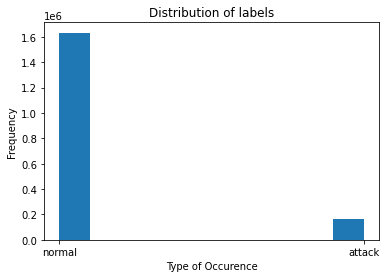

In [100]:
plt.hist(awid_target_div)
plt.title("Distribution of labels")
plt.xlabel("Type of Occurence")
plt.ylabel("Frequency")

In [101]:
awid_div = awid
awid_div["class"] = awid_target_div

In [102]:
awid_div['class'] = awid_div['class'].replace("normal",0)
awid_div['class'] = awid_div['class'].replace("attack",1)

In [103]:
test_div = awid_test
test_div['class'] = awid_test_target.replace("normal",0)
test_div['class'] = awid_test_target.replace("attack",1)

In [104]:
awid_div.head()

,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.channel,...,wlan.da,wlan.ta,wlan.sa,wlan.bssid,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.key,data.len,class
0,1.393661e+09,0.000000,0.000000,0.000000,261,261,26,1,1,1,...,281474976710655,193825345790499,193825345790499,193825345790499,0,2851,1,0,0,0
1,1.393661e+09,0.024271,0.024271,0.024271,185,185,26,1,1,1,...,281474976710655,61721325520229,61721325520229,61721325520229,0,2159,1,0,0,0
2,1.393661e+09,0.001631,0.001631,0.025902,185,185,26,1,1,1,...,281474976710655,61721326947624,61721326947624,61721326947624,0,291,1,0,0,0
3,1.393661e+09,0.055325,0.055325,0.081227,159,159,26,1,1,1,...,281474976710655,82468889197,82468889197,82468889197,0,3684,1,0,0,0
4,1.393661e+09,0.000415,0.000415,0.081642,54,54,26,1,1,1,...,44833259836374,162083440591,162083440591,44833259836374,0,3874,1,0,0,0


In [105]:
# Find correlations with the target and sort
correlations = awid_div.corr()['class'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 radiotap.flags.wep              NaN
radiotap.flags.frag             NaN
radiotap.flags.datapad          NaN
radiotap.flags.badfcs           NaN
radiotap.flags.shortgi          NaN
radiotap.channel.type.turbo     NaN
radiotap.channel.type.5ghz      NaN
radiotap.channel.type.passive   NaN
radiotap.channel.type.dynamic   NaN
radiotap.channel.type.gfsk      NaN
radiotap.channel.type.gsm       NaN
radiotap.channel.type.sturbo    NaN
radiotap.channel.type.half      NaN
radiotap.channel.type.quarter   NaN
radiotap.rxflags.badplcp        NaN
Name: class, dtype: float64

Most Negative Correlations:
 wlan.fc.subtype              -0.398813
radiotap.channel.type.ofdm   -0.350331
radiotap.datarate            -0.320679
frame.len                    -0.200726
frame.cap_len                -0.200726
data.len                     -0.198957
wlan.fc.retry                -0.120321
wlan.wep.key                 -0.035844
wlan.seq                     -0.021902
frame.time_delta      

In [106]:
import seaborn as sns

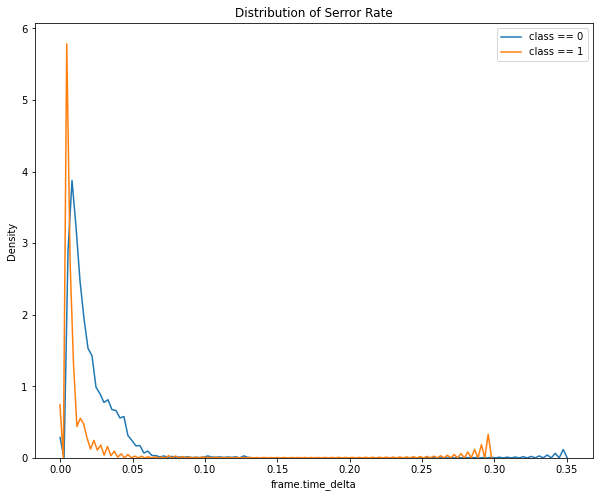

In [107]:
plt.figure(figsize = (10, 8))

# KDE plot of normal occurence
sns.kdeplot(awid_div.loc[awid_div['class'] == 0, 'frame.time_delta'] , label = 'class == 0')

# KDE plot of attacks
sns.kdeplot(awid_div.loc[awid_div['class'] == 1, 'frame.time_delta'] , label = 'class == 1')

# Labeling of plot
plt.xlabel('frame.time_delta'); plt.ylabel('Density'); plt.title('Distribution of Serror Rate');

In [108]:
awid_div["frame.time_delta"].unique()

array([0.      , 0.024271, 0.001631, ..., 0.031383, 0.036295, 0.022597])

In [109]:
#anything above serror rate = 0.5 is almost certainly an attack
a=0
b=-1
dummy =[]
for i in awid_div["class"]:
    b+=1
    if awid_div["class"][b]==1 and awid_div["frame.time_delta"][b] ==1:
        a+=1
        dummy.append(awid_div["frame.time_delta"][b])
print(a)

0


In [110]:
print("Percentage of Attacks with dst_serror_rate >= 0.5 : ", a/((awid_div["class"] ==1).value_counts()[True]) * 100)

Percentage of Attacks with dst_serror_rate >= 0.5 :  0.0


In [111]:
serror_rate_attack_1 = dummy
print(len(serror_rate_attack_1))
diff = len(awid_div["frame.time_delta"]) - len(serror_rate_attack_1)
print(diff)

0
1795575


In [112]:
dummy2 = [np.mean(serror_rate_attack_1) for i in range(0,diff)] 
len(serror_rate_attack_1)

/home/shaubhik_2111cs19/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shaubhik_2111cs19/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0

In [113]:
#Further exploratory data analysis requires interaction between features be seen
#Taking three most negatively and positively correlated features and seeing correlations b/w them
ext_data = awid[['class','frame.len','frame.time_relative','wlan.fc.subtype', 'wlan.da','radiotap.datarate' ]]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,class,frame.len,frame.time_relative,wlan.fc.subtype,wlan.da,radiotap.datarate
class,1.000000,-0.200726,0.146209,-0.398813,0.377001,-0.320679
frame.len,-0.200726,1.000000,-0.199608,-0.182199,0.361937,0.755426
frame.time_relative,0.146209,-0.199608,1.000000,-0.224889,0.078696,-0.217900
wlan.fc.subtype,-0.398813,-0.182199,-0.224889,1.000000,-0.601553,-0.083112
wlan.da,0.377001,0.361937,0.078696,-0.601553,1.000000,0.025542
radiotap.datarate,-0.320679,0.755426,-0.217900,-0.083112,0.025542,1.000000


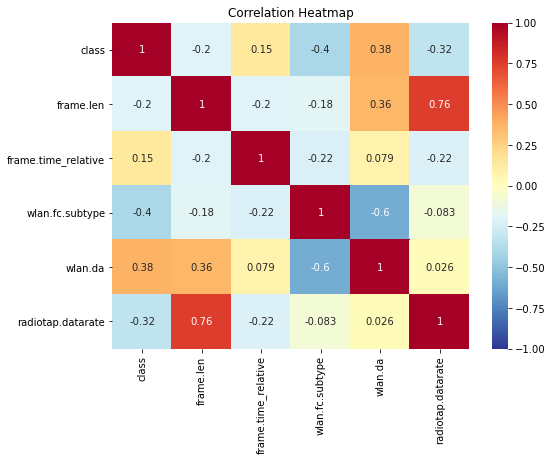

In [114]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = 1)
plt.title('Correlation Heatmap');

/home/shaubhik_2111cs19/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/shaubhik_2111cs19/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


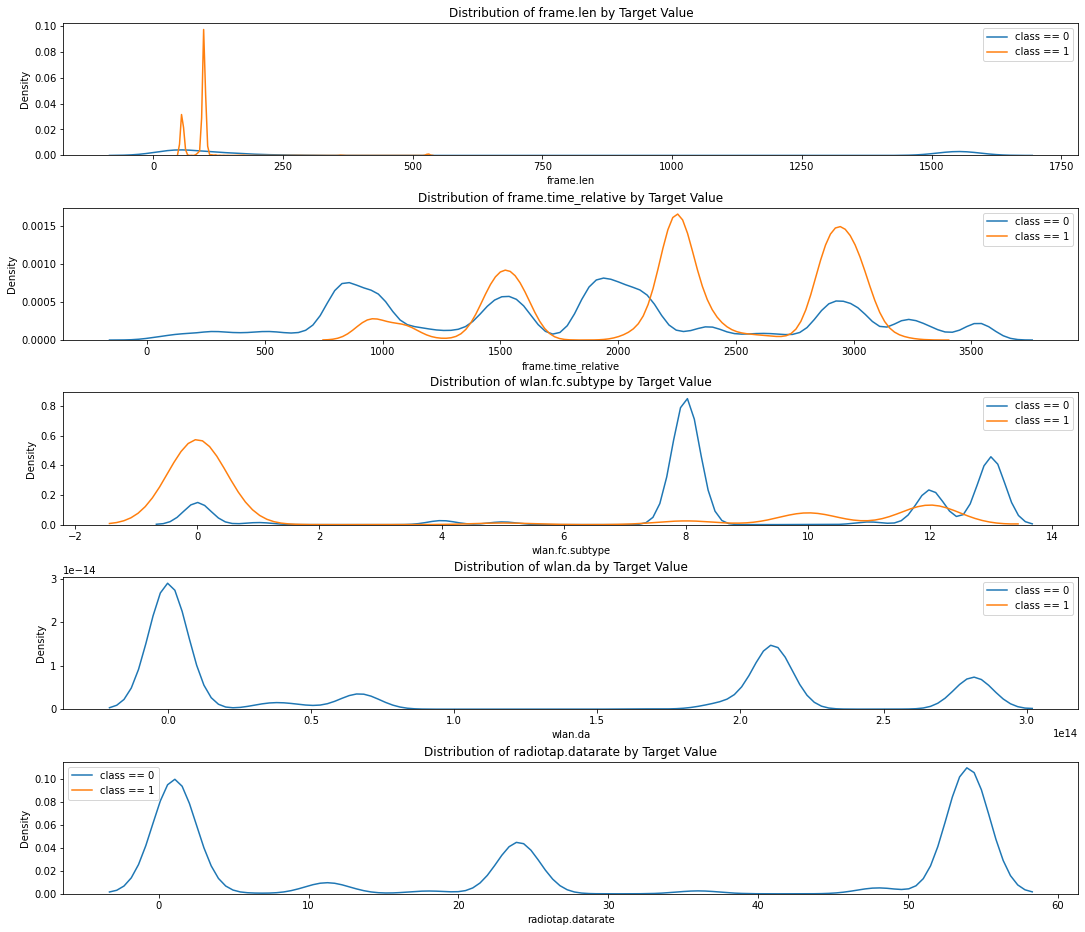

In [115]:
plt.figure(figsize = (15,15))

# iterate through the sources
for i, source in enumerate(['frame.len','frame.time_relative','wlan.fc.subtype', 'wlan.da','radiotap.datarate' ]):
    
    # create a new subplot for each source
    plt.subplot(6, 1, i+1)
    # plot repaid loans
    sns.kdeplot(awid_div.loc[awid_div['class'] == 0, source], label = 'class == 0')
    # plot loans that were not repaid
    sns.kdeplot(awid_div.loc[awid_div['class'] == 1, source], label = 'class == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(pad =0.44)

In [116]:
#INTERACTION TERMS 
#POLYNOMIAL FEATURES
#WHATEVER IS DONE TO TRAIN SET NEEDS TO BE DONE TO TEST SET ASWELL
#COULD HAVE USED PAIRS PLOT BUT LETS LEAVE THAT FOR NOW

poly_features = awid_div[['frame.len','frame.time_relative','wlan.fc.subtype', 'wlan.da','radiotap.datarate','class']]
poly_features_test =test_div[['frame.len','frame.time_relative','wlan.fc.subtype', 'wlan.da','radiotap.datarate']]


poly_target = poly_features['class']
poly_features = poly_features.drop(columns = ['class'])


from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 2)

In [117]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (1795575, 21)


In [118]:
poly_transformer.get_feature_names(input_features = ['frame.len','frame.time_relative','wlan.fc.subtype', 'wlan.da','radiotap.datarate'])[:15]

/home/shaubhik_2111cs19/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'frame.len',
 'frame.time_relative',
 'wlan.fc.subtype',
 'wlan.da',
 'radiotap.datarate',
 'frame.len^2',
 'frame.len frame.time_relative',
 'frame.len wlan.fc.subtype',
 'frame.len wlan.da',
 'frame.len radiotap.datarate',
 'frame.time_relative^2',
 'frame.time_relative wlan.fc.subtype',
 'frame.time_relative wlan.da',
 'frame.time_relative radiotap.datarate']

In [119]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['frame.len','frame.time_relative','wlan.fc.subtype', 'wlan.da','radiotap.datarate']))

# Add in the target
poly_features['class'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['class'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

wlan.fc.subtype                         -0.398813
wlan.fc.subtype radiotap.datarate       -0.327649
radiotap.datarate                       -0.320679
wlan.fc.subtype^2                       -0.291607
radiotap.datarate^2                     -0.281053
frame.time_relative radiotap.datarate   -0.264087
frame.len wlan.fc.subtype               -0.218791
frame.len radiotap.datarate             -0.211840
frame.time_relative wlan.fc.subtype     -0.203437
frame.len^2                             -0.202691
Name: class, dtype: float64
wlan.da                        0.377001
frame.time_relative wlan.da    0.405602
wlan.da^2                      0.430227
class                          1.000000
1                                   NaN
Name: class, dtype: float64


In [120]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['frame.len','frame.time_relative','wlan.fc.subtype', 'wlan.da','radiotap.datarate']))

In [121]:
awid_div['index_col'] = awid_div.index
test_div['index_col'] = test_div.index

In [122]:
# Merge polynomial features into training dataframe
poly_features['index_col'] = awid_div['index_col']
awid_div_poly = awid_div.merge(poly_features, on = 'index_col', how = 'left')

In [123]:
# Merge polnomial features into testing dataframe
poly_features_test['index_col'] = awid_test['index_col']
test_poly = test_div.merge(poly_features_test, on = 'index_col', how = 'left')

# Align the dataframes
awid_div_poly, test_poly = awid_div_poly.align(test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', awid_div_poly.shape)
print('Testing data with polynomial features shape:  ', test_poly.shape)

Training data with polynomial features shape:  (1795575, 81)
Testing data with polynomial features shape:   (575643, 81)


In [124]:
awid_target_div = awid_div['class']
test_div = test_div.drop('class',axis=1)

In [125]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

clfs = {
#     'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
#    'svm1': SVC(kernel='linear'),
#   'svm2': SVC(kernel='rbf'),
#    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
   'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

In [126]:
#targets are original here
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(awid_div_poly, awid_target)
    y_pred = clf.predict(test_poly)
    f1_scores[clf_name] = f1_score(y_pred, awid_test_target,average="weighted")

gnb
mlp1
mlp2
ada
dtc
rfc
gbc
lr


/home/shaubhik_2111cs19/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
f1_scores

{'gnb': 0.7761893775379749,
 'mlp1': 0.9594569190222951,
 'mlp2': 0.9593943464468931,
 'ada': 0.5161956208118216,
 'dtc': 0.962075231281951,
 'rfc': 0.9602212712249049,
 'gbc': 0.9763373615878296,
 'lr': 0.027741802857436534}

In [128]:
accuracy={}
for i in clfs:
    accuracy[i] = clfs[i].score(test_poly, awid_test_target)
accuracy

{'gnb': 0.8032044166262771,
 'mlp1': 0.9220732294147588,
 'mlp2': 0.9220315369074236,
 'ada': 0.605363046193561,
 'dtc': 0.9549321367583729,
 'rfc': 0.9323295862192366,
 'gbc': 0.9584429933135641,
 'lr': 0.014066009662238576}

In [130]:
#Dimensionality reduction will be used to reduce redundant features
#LETS DETERMINE IMPORTANT FEATURES# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [131]:
# Train on the training data
random_forest.fit(awid_div_poly, awid_target_div)
features = list(awid_div_poly.columns)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test_poly)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 192 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of 100 | elapsed:   47.6s remaining:  3.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.2s remaining:   10.3s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    1.5s finished


In [132]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

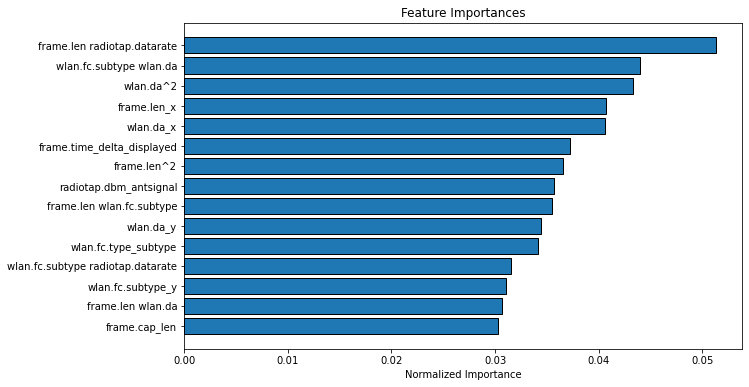

In [133]:
feature_importances_sorted = plot_feature_importances(feature_importances)

In [134]:
selected_important_features = feature_importances_sorted[:20]

In [135]:
#creatre new dataframe with only top 20 important features
selected_list=[x for x in selected_important_features.feature]
train_selected = pd.DataFrame(awid_div_poly,columns = selected_list)
test_selected = pd.DataFrame(test_poly,columns = selected_list)

In [137]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

clfs = {
#     'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
#    'svm1': SVC(kernel='linear'),
#   'svm2': SVC(kernel='rbf'),
#    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
   'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

In [138]:
#original
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(train_selected, awid_target)
    y_pred = clf.predict(test_selected)
    f1_scores[clf_name] = f1_score(y_pred, awid_test_target,average="weighted")

gnb
mlp1
mlp2
ada
dtc
rfc
gbc
lr


/home/shaubhik_2111cs19/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [139]:
f1_scores

{'gnb': 0.7761893775379749,
 'mlp1': 0.9594569190222951,
 'mlp2': 0.9594569190222951,
 'ada': 0.8157658497289806,
 'dtc': 0.9668814748020083,
 'rfc': 0.971317046048412,
 'gbc': 0.9764034334537112,
 'lr': 0.027741802857436534}

In [141]:
accuracy={}
for i in clfs:
    accuracy[i] = clfs[i].score(test_selected, awid_test_target)
accuracy

{'gnb': 0.8032044166262771,
 'mlp1': 0.9220732294147588,
 'mlp2': 0.9220732294147588,
 'ada': 0.835915663006412,
 'dtc': 0.951753083074058,
 'rfc': 0.9542546335141746,
 'gbc': 0.9585263783282347,
 'lr': 0.014066009662238576}

In [142]:
#USING PCA ON TOP OF RANDOM FORESTS FOR FEATURE SELECTION
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_selected)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_selected)
test_img = scaler.transform(test_selected)

In [143]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [144]:
pca.fit(train_selected)

PCA(n_components=0.95)

In [145]:
train_selected_pca = pca.transform(train_img)
test_selected_pca = pca.transform(test_img)

/home/shaubhik_2111cs19/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/shaubhik_2111cs19/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [146]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

clfs = {
#    'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
#    'svm1': SVC(kernel='linear'),
#   'svm2': SVC(kernel='rbf'),
#    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
   'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

In [147]:
#original
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(train_selected_pca, awid_target)
    y_pred = clf.predict(test_selected_pca)
    f1_scores[clf_name] = f1_score(y_pred, awid_test_target,average="weighted")

gnb
mlp1
mlp2
ada
dtc
rfc
gbc
lr


/home/shaubhik_2111cs19/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [148]:
f1_scores

{'gnb': 0.9594569190222951,
 'mlp1': 0.9594569190222951,
 'mlp2': 0.9594569190222951,
 'ada': 0.9594569190222951,
 'dtc': 0.9594569190222951,
 'rfc': 0.9594569190222951,
 'gbc': 0.9594569190222951,
 'lr': 0.027741802857436534}

In [149]:
accuracy={}
for i in clfs:
    accuracy[i] = clfs[i].score(test_selected_pca, awid_test_target)
accuracy

{'gnb': 0.9220732294147588,
 'mlp1': 0.9220732294147588,
 'mlp2': 0.9220732294147588,
 'ada': 0.9220732294147588,
 'dtc': 0.9220732294147588,
 'rfc': 0.9220732294147588,
 'gbc': 0.9220732294147588,
 'lr': 0.014066009662238576}